#**Aula 2**

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
import pandas as pd
inmuebles = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Inmersion_Alura_DataScience/inmuebles_bogota.csv')

In [61]:
inmuebles.sample(5)

,Tipo,Descripcion,Habitaciones,Baños,Área,Barrio,UPZ,Valor
214,Apartamento,Apartamento en venta en Chapinero,3,2,95,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 650.000.000
4077,Casa,Casa en venta en Barrios Unidos,5,4,231,Barrios Unidos,Los Andes,$ 1.000.000.000
9063,Apartamento,Apartamento en venta en Chapinero,3,5,219,Chapinero,CHAPINERO: Pardo Rubio + Chapinero,$ 1.200.000.000
469,Apartamento,Apartamento en venta en Villa Alsacia,3,2,78,Villa Alsacia,KENNEDY: Castilla + Bavaria,$ 400.000.000
4107,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,63,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 298.000.000


In [62]:
columnas = {'Baños':'Banos','Área':'Area'}#Cambio nombre de columnas
inmuebles = inmuebles.rename(columns=columnas)
inmuebles.sample(10)#Cantidad a ver

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor
6092,Casa,Casa en venta en Santa Ana,4,4,260,Santa Ana,Usaquén,$ 2.900.000.000
9430,Apartamento,Apartamento en venta en Cedritos,3,3,116,Cedritos,Usaquén,$ 490.000.000
6769,Apartamento,Apartamento en venta en El Plan,3,2,77,El Plan,El Rincón,$ 440.000.000
4212,Apartamento,Apartamento en venta en Engativa,3,2,50,Engativa,Engativá,$ 160.500.000
8883,Casa,Casa en venta en Restrepo,14,3,364,Restrepo,Restrepo,$ 700.000.000
3150,Apartamento,Apartamento en venta en Usaquén,4,5,402,Usaquén,Usaquén,$ 5.200.000.000
6915,Casa,Casa en venta en Usaquén,4,3,250,Usaquén,Usaquén,$ 920.000.000
1855,Apartamento,Apartamento en venta en Capellania,3,2,78,Capellania,Modelia,$ 495.000.000
45,Apartamento,Apartamento en venta en Usaquén,2,2,80,Usaquén,Usaquén,$ 349.000.000
6269,Apartamento,Apartamento en venta en Zona Noroccidental,3,2,77,Zona Noroccidental,CHAPINERO: Pardo Rubio + Chapinero,$ 310.000.000


In [63]:
inmuebles.info() #Cantidad de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
dtypes: int64(3), object(5)
memory usage: 595.1+ KB


In [64]:
inmuebles.Valor[0]

'$ 360.000.000'

In [65]:
type(inmuebles.Valor[0])

str

In [66]:
inmuebles.Valor[0] + inmuebles.Valor[1] # son strings

'$ 360.000.000$ 670.000.000'

In [67]:
inmuebles.Valor[0]+inmuebles.Valor[1]+inmuebles.Valor[:5] #Se concatenan

0      $ 360.000.000$ 670.000.000$ 360.000.000
1      $ 360.000.000$ 670.000.000$ 670.000.000
2    $ 360.000.000$ 670.000.000$ 1.120.000.000
3      $ 360.000.000$ 670.000.000$ 890.000.000
4      $ 360.000.000$ 670.000.000$ 970.000.000
Name: Valor, dtype: object

In [68]:
inmuebles.Valor[0].split() # separa por default el espacio

['$', '360.000.000']

In [69]:
inmuebles.Valor.str.split()

0         [$, 360.000.000]
1         [$, 670.000.000]
2       [$, 1.120.000.000]
3         [$, 890.000.000]
4         [$, 970.000.000]
               ...        
9515      [$, 290.000.000]
9516      [$, 670.000.000]
9517      [$, 900.000.000]
9518      [$, 335.000.000]
9519      [$, 144.990.000]
Name: Valor, Length: 9520, dtype: object

In [70]:
type(inmuebles.Valor.str.split())

pandas.core.series.Series

In [71]:
inmuebles.Valor.str.split(expand=True) #Formato detaframe, no en series

,0,1
0,$,360.000.000
1,$,670.000.000
2,$,1.120.000.000
3,$,890.000.000
4,$,970.000.000
...,...,...
9515,$,290.000.000
9516,$,670.000.000
9517,$,900.000.000
9518,$,335.000.000


*Adiciona una nueva columna para separar el simbolo de dolar con la cantidad*

In [72]:
valor = inmuebles.Valor.str.split(expand=True)
inmuebles['Moneda'] = valor[0]
inmuebles['Precio'] = valor[1]
inmuebles.sample(3)

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio
2985,Apartamento,Apartamento en venta en Los Lagartos,3,3,102,Los Lagartos,La Floresta,$ 600.000.000,$,600.000.000
6440,Apartamento,Apartamento en venta en Usaquén,1,2,66,Usaquén,Usaquén,$ 449.500.000,$,449.500.000
7530,Casa,Casa en venta en Santa Barbara,4,5,296,Santa Barbara,USAQUÉN: Country Club + Santa Bárbara,$ 1.350.000.000,$,1.350.000.000


In [73]:
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
 8   Moneda        9520 non-null   object
 9   Precio        9520 non-null   object
dtypes: int64(3), object(7)
memory usage: 743.9+ KB


In [74]:
inmuebles['Precio'].sum() #Concatena todo

'360.000.000670.000.0001.120.000.000890.000.000970.000.000510.000.000500.000.0002.350.000.000850.000.000642.000.000652.000.000168.000.000205.000.000300.000.000680.000.0002.519.000.000420.000.000620.000.000239.000.0001.600.000.000420.000.000625.000.0002.799.000.0001.450.000.0002.000.000.000670.000.0001.800.000.000469.000.000580.000.000445.000.000261.500.000278.000.000258.000.000520.000.000200.000.000129.000.000350.000.000290.500.000750.000.000495.000.000285.000.000900.000.0001.800.000.000990.000.000418.000.000349.000.000565.000.000370.000.000259.000.000310.000.000354.000.000372.000.000500.000.000420.000.0001.050.000.000185.000.000349.000.000515.000.000287.000.000265.000.000500.000.000261.500.000300.000.000278.000.000258.000.000520.000.000350.000.000290.500.000129.000.000200.000.000750.000.000418.000.000495.000.000349.000.000310.000.000565.000.000370.000.000259.000.000354.000.000285.000.000420.000.000372.000.000500.000.000185.000.0001.050.000.000349.000.0001.800.000.000900.000.000990.000

In [75]:
inmuebles['Precio'] = inmuebles['Precio'].str.replace('.','',regex=True) #cambio de formato

In [76]:
inmuebles[['Precio','Barrio']] #Formato dataframe

,Precio,Barrio
0,360000000,Zona Noroccidental
1,670000000,Castilla
2,1120000000,Chico Reservado
3,890000000,Usaquén
4,970000000,Bella Suiza
...,...,...
9515,290000000,Kennedy
9516,670000000,Parque Central Bavaria
9517,900000000,Restrepo
9518,335000000,Engativa


In [77]:
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tipo          9520 non-null   object
 1   Descripcion   9520 non-null   object
 2   Habitaciones  9520 non-null   int64 
 3   Banos         9520 non-null   int64 
 4   Area          9520 non-null   int64 
 5   Barrio        9520 non-null   object
 6   UPZ           9478 non-null   object
 7   Valor         9520 non-null   object
 8   Moneda        9520 non-null   object
 9   Precio        9520 non-null   object
dtypes: int64(3), object(7)
memory usage: 743.9+ KB


In [78]:
inmuebles['Precio_Millon'] = inmuebles.Precio.astype('float')/1000000 #Transformar tipo dato, nuevo atributo en el dataframe
inmuebles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9520 entries, 0 to 9519
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           9520 non-null   object 
 1   Descripcion    9520 non-null   object 
 2   Habitaciones   9520 non-null   int64  
 3   Banos          9520 non-null   int64  
 4   Area           9520 non-null   int64  
 5   Barrio         9520 non-null   object 
 6   UPZ            9478 non-null   object 
 7   Valor          9520 non-null   object 
 8   Moneda         9520 non-null   object 
 9   Precio         9520 non-null   object 
 10  Precio_Millon  9520 non-null   float64
dtypes: float64(1), int64(3), object(7)
memory usage: 818.2+ KB


In [79]:
inmuebles.describe()#datos estadisticos en conjunto

,Habitaciones,Banos,Area,Precio_Millon
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


In [80]:
pd.set_option('display.precision',2)# dos decimales
pd.set_option('display.float_format', lambda x: '%.2f' % x)# formato float
inmuebles.describe()

,Habitaciones,Banos,Area,Precio_Millon
count,9520.00,9520.00,9520.00,9520.00
mean,3.07,2.45,146.66,602.06
std,2.05,1.26,1731.38,704.60
min,1.00,0.00,2.00,60.00
25%,2.00,2.00,57.00,250.00
50%,3.00,2.00,80.00,409.18
75%,3.00,3.00,135.00,680.00
max,110.00,9.00,166243.00,16000.00


In [81]:
inmuebles.Habitaciones == 110

0       False
1       False
2       False
3       False
4       False
        ...  
9515    False
9516    False
9517    False
9518    False
9519    False
Name: Habitaciones, Length: 9520, dtype: bool

In [82]:
inmuebles.loc[inmuebles.Habitaciones == 110] #localizar atributos que poseen la condicion

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon
897,Casa,Casa en venta en La Uribe,110,2,110,La Uribe,Usaquén,$ 480.000.000,$,480000000,480.00


In [83]:
inmuebles.loc[inmuebles.Area == 2]

,Tipo,Descripcion,Habitaciones,Banos,Area,Barrio,UPZ,Valor,Moneda,Precio,Precio_Millon
8401,Apartamento,Apartamento en venta en San Cristobal,3,1,2,San Cristobal,Sosiego,$ 180.000.000,$,180000000,180.00


<Axes: ylabel='Frequency'>

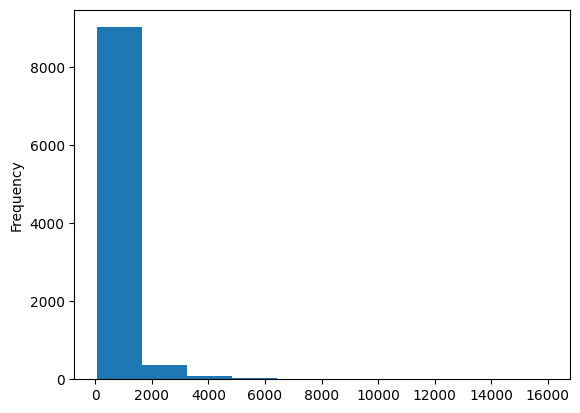

In [84]:
inmuebles['Precio_Millon'].plot.hist(bins=10)

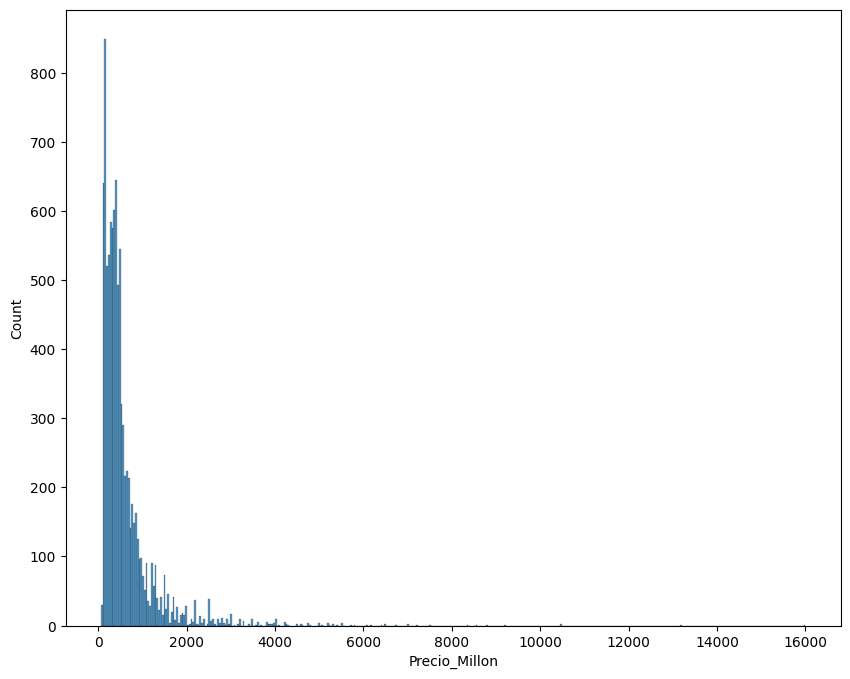

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns #Libreria seaborn - Visualizacion datos estadisticos

plt.figure(figsize=(10,8))
sns.histplot(data=inmuebles, x='Precio_Millon')
plt.show()


#Datos extra en el grafico

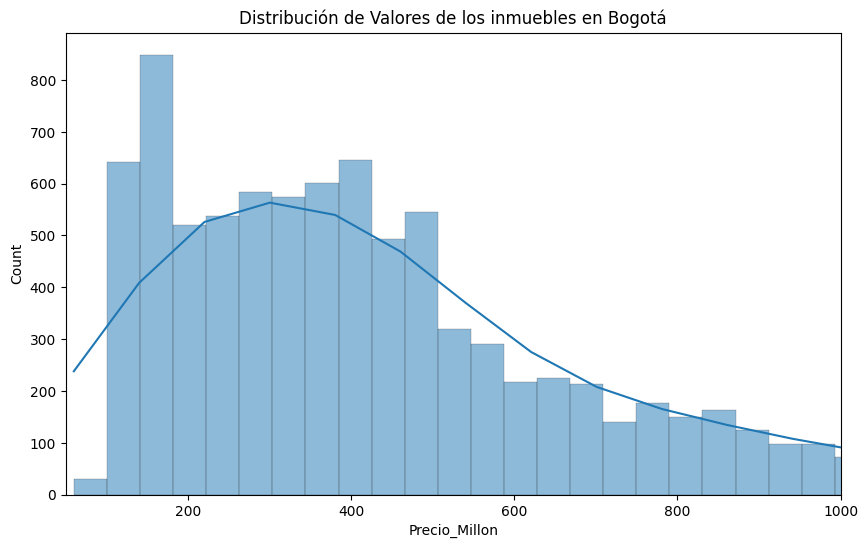

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns #Libreria seaborn - Visualizacion datos estadisticos

plt.figure(figsize=(10,6))
grafica = sns.histplot(data=inmuebles, x='Precio_Millon',kde=True)
grafica.set_title('Distribución de Valores de los inmuebles en Bogotá')
plt.xlim((50,1000))
plt.show()

#Guardado de grafico

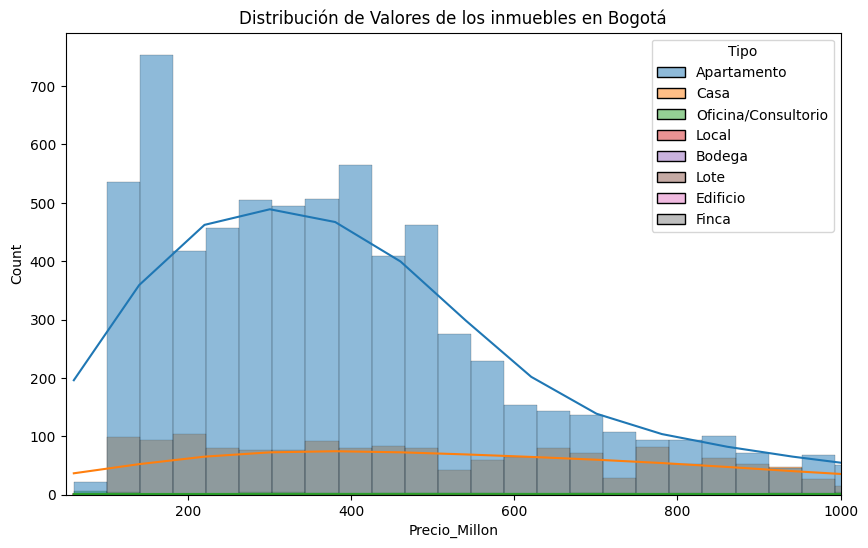

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns #Libreria seaborn - Visualizacion datos estadisticos

plt.figure(figsize=(10,6))
grafica = sns.histplot(data=inmuebles, x='Precio_Millon',kde=True,hue='Tipo')
grafica.set_title('Distribución de Valores de los inmuebles en Bogotá')
plt.xlim((50,1000))
#plt.ylim((0,20))
plt.savefig('/content/drive/MyDrive/Colab Notebooks/Inmersion_Alura_DataScience/winpenguins.png',format='png')
plt.show()

**Desafíos**

1. Estudiar mejor el histograma de valores, seleccionar 3 tipos de inmuebles (Refinar el gráfico: Títulos, aumentar el tamaño de labels, colores, conclusión de la información)

2. Precio del m2 por barrio y hacer el gráfico más adecuado para esta nueva variable.

# **Desafio 2.1**

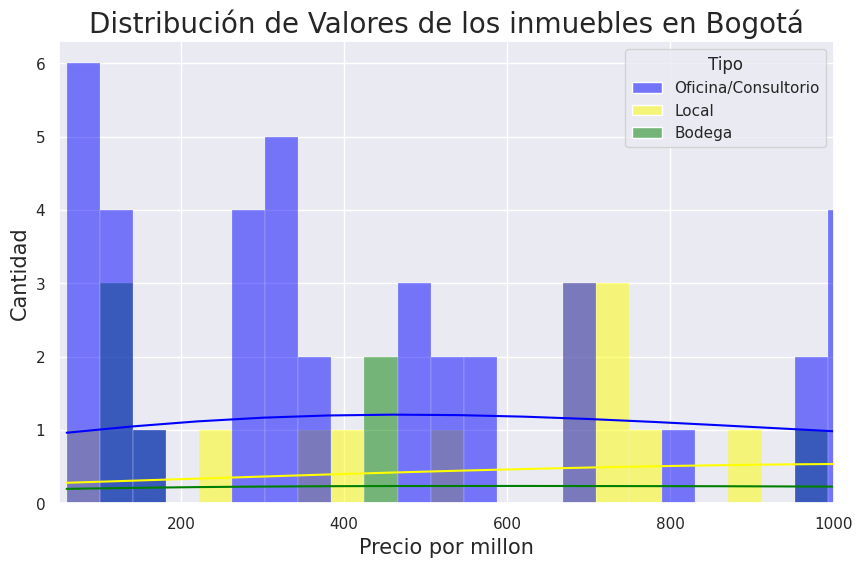

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns #Libreria seaborn - Visualizacion datos estadisticos

sns.set()
#p = sns.lineplot(data = inmuebles)
#p.set_xlabel("X-Axis", fontsize = 20)
#p.set_ylabel("Y-aAxis", fontsize = 20)
#p.set_title("Distribución de Valores de los inmuebles en Bogotá", fontsize = 20)
#plt.legend(labels=["Legend_Day1","Legend_Day2"], fontsize = 20)

plt.figure(figsize=(10,6))
grafica = sns.histplot(data=inmuebles, x='Precio_Millon',kde=True,hue='Tipo',palette=["Blue","Yellow","Green"],hue_order=["Oficina/Consultorio", "Local","Bodega"])
grafica.set_title('Distribución de Valores de los inmuebles en Bogotá', fontsize = 20)
grafica.set_xlabel("Precio por millon", fontsize = 15)
grafica.set_ylabel("Cantidad", fontsize = 15)
p.set_ylabel("Cantidad", fontsize = 20)
plt.xlim((50,1000))
plt.show()

De la información escogida que fueron las oficinas-consultorios, locales y bodegas se encuentran en menor cantidad con respecto a otros datos como casas y apartamentos. Los precios también difieren entre sí de forma my visible con los aposentos que se presentan una mayor cantidad que son las casas y apartamentos.

Con los datos presentes en el gráfico se puede notar que en Bogotá los tipos de inmuebles escogidos, el que posee mayor cantidad son las oficinas y además, son las que tienen un mayor costo.

# **Desafio 2.2 - Precio del m2 por barrio y hacer el gráfico más adecuado para esta nueva variable.**

<Axes: title={'center': 'Costo promedio por m2 por barrio, primeros 15 resultados'}, xlabel='Precio por m2', ylabel='Localidad'>

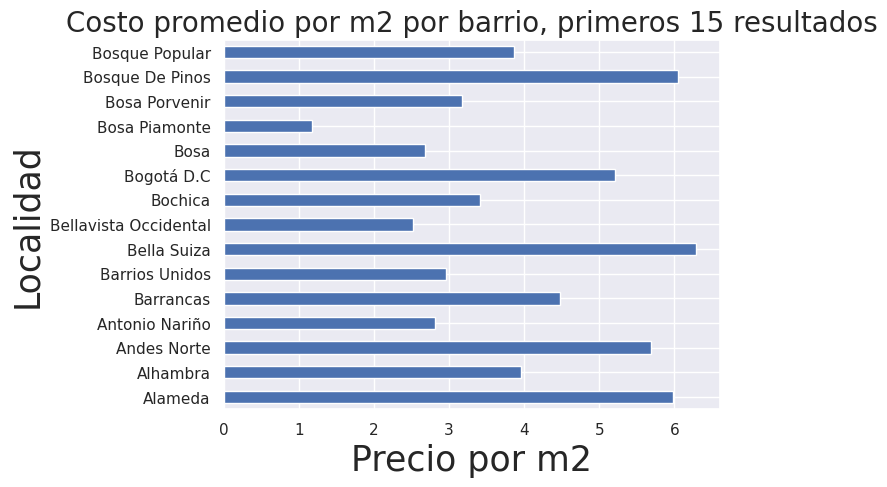

In [146]:
import matplotlib.pyplot as plt

area = inmuebles[['Barrio','Area','Precio_Millon']].groupby('Barrio').sum()
area ['Precio_m2'] = area['Precio_Millon'] / area['Area']
primerosResultados = area['Precio_m2'].head(15).plot.barh()
plt.title("Costo promedio por m2 por barrio, primeros 15 resultados",fontsize=20)
plt.ylabel("Localidad", fontsize=25)
plt.xlabel("Precio por m2",fontsize=25)
primerosResultados

#**Aula 3**